In [1]:
%reload_ext autoreload
%autoreload 2

import torch
import torch.nn.functional as F

from torchvtk.utils import make_4d, make_5d
import matplotlib.pyplot as plt

from ipyannotations.images import PolygonAnnotator

## Settings

In [2]:
SCALE_FACTOR=0.25

## Get Data (replace with Upload)

In [3]:
data = torch.load('/run/media/dome/Data/data/Volumes/CT-ORG/torch/volume_010.pt')
vol = data['vol'].float()
lowres_vol = F.interpolate(make_5d(vol), scale_factor=SCALE_FACTOR, mode='nearest').squeeze(0)
indices = [[int(0.33*s), int(0.5*s), int(0.67*s)] for s in lowres_vol.shape[-3:]]
slices = [lowres_vol[..., s, :, :] for s in indices[0]] + \
         [lowres_vol[..., :, s, :] for s in indices[1]] + \
         [lowres_vol[..., :, :, s] for s in indices[2]]

In [4]:
for s in slices: print(s.shape)

torch.Size([1, 128, 125])
torch.Size([1, 128, 125])
torch.Size([1, 128, 125])
torch.Size([1, 128, 125])
torch.Size([1, 128, 125])
torch.Size([1, 128, 125])
torch.Size([1, 128, 128])
torch.Size([1, 128, 128])
torch.Size([1, 128, 128])


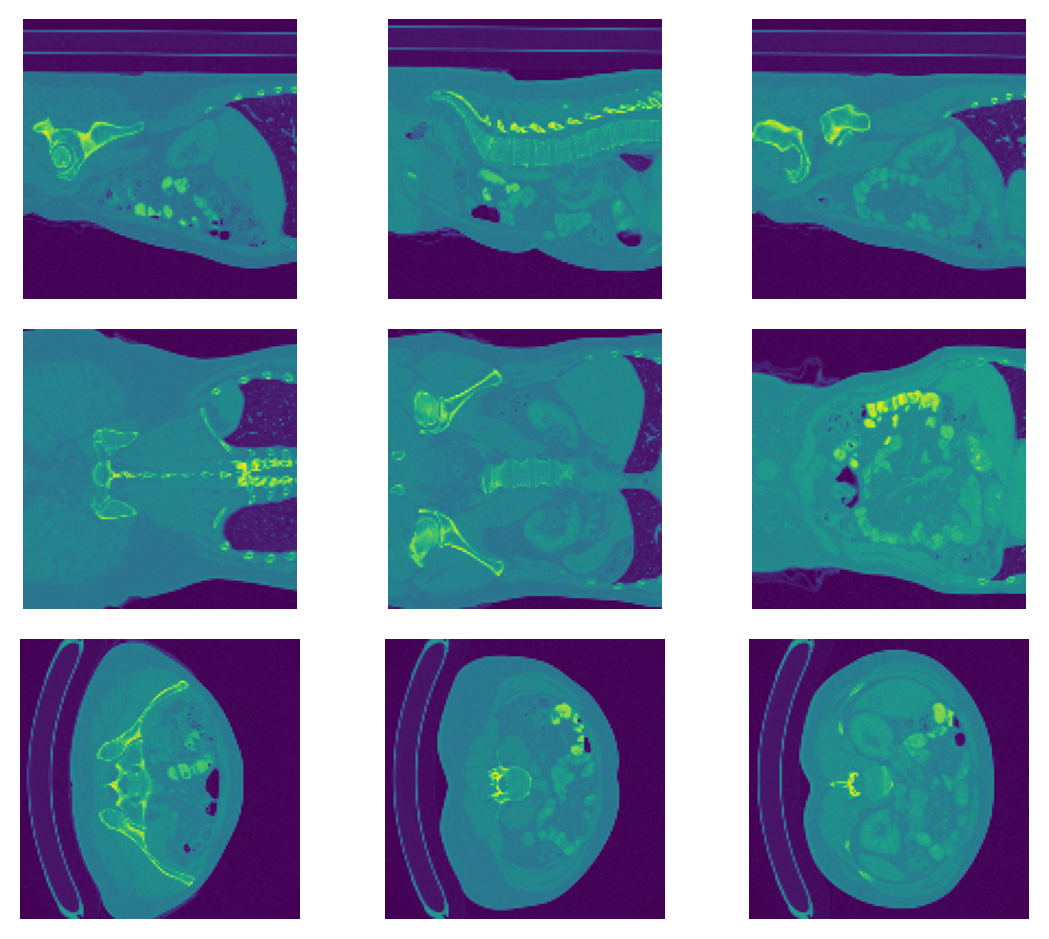

In [5]:
fig, ax = plt.subplots(3,3, tight_layout=True, dpi=200)
ax[0, 0].imshow(slices[0].squeeze())
ax[0, 1].imshow(slices[1].squeeze())
ax[0, 2].imshow(slices[2].squeeze())
ax[1, 0].imshow(slices[3].squeeze())
ax[1, 1].imshow(slices[4].squeeze())
ax[1, 2].imshow(slices[5].squeeze())
ax[2, 0].imshow(slices[6].squeeze())
ax[2, 1].imshow(slices[7].squeeze())
ax[2, 2].imshow(slices[8].squeeze())
for x in ax.reshape(-1): x.set_axis_off()


In [9]:
widget = PolygonAnnotator(canvas_size=(768, 768), options=["bone", "lung", "background"])

In [10]:
widget.display(slices[0].squeeze().numpy())

In [11]:
widget

PolygonAnnotator(children=(Event(source=PolygonAnnotator(children=(...), layout=Layout(width='768px')), thrott…